# Quality Control of Whole Genome Sequencing

## Display metrics distribution

In [1]:
import pandas as pd

# Helper function: Read metrics.json file, and reformat the resulting dataframe
def preprocess_json(file):
    df_ = pd.read_json(file)
    df_.columns = ['biosample', df_['biosample']['id']]
    df_ = df_.drop(columns=['biosample'])
    df_ = df_.drop(['id'])
    return df_

ylims = {
    # 'cross_contamination_rate': [0,0.02],
    # 'pct_autosomes_15x': [95, 97],
}

In [2]:
import pandas as pd
import glob

# Load all the metrics.json file within a directory
files = glob.glob(f'../n.100-1kg-dragen3.7.6-npm-sample-qc-vc-results/*.metrics.json')
# Parse 1 file in 1 df
df_array = [preprocess_json(file) for file in files]
# Concat all df into one
df_ = pd.concat(df_array, axis=1, ignore_index=False)
# Transpose
dft = df_.T.reset_index()

dft


# Read the samples metadata csv file into pandas DataFrames
df_metadata = pd.read_csv('../1KG_100samples_info_igsr.csv')
df_metadata


# Select only the 'Sample_name' 'Sex' and 'Population_name' columns from df_metadata
df_metadata = df_metadata[['Sample_name', 'Sex', 'Superpopulation_code']]


# Merge the DataFrames on the 'Sample_name' column, retaining all rows from dft
# merged_df = pd.merge(dft, df_metadata1, on='Sample_name', how='left')
merged_dft = pd.merge(dft, df_metadata, left_on='index', right_on='Sample_name', how='left')

merged_dft



,index,count_deletions,count_insertions,count_snvs,cross_contamination_rate,insert_size_std_deviation,mad_autosome_coverage,mean_autosome_coverage,mean_insert_size,pct_autosomes_15x,pct_reads_mapped,pct_reads_properly_paired,ratio_heterozygous_homzygous_indel,ratio_heterozygous_homzygous_snv,ratio_insertion_deletion,ratio_transitions_transversions,yield_bp_q30,Sample_name,Sex,Superpopulation_code
0,NA20298,508149.0,482966.0,4727801.0,1.879880e-06,100.7,5.0,32.29914,445.6,95.9107,99.70689,97.85116,2.68,2.02,0.95,1.97,1.094037e+11,NA20298,male,AFR
1,NA20317,492862.0,472846.0,4559642.0,4.049210e-09,101.0,4.0,30.71611,443.5,95.8931,99.71659,97.84460,2.77,2.11,0.96,1.97,1.054617e+11,NA20317,female,AFR
2,NA20342,490970.0,471325.0,4540103.0,2.665030e-09,99.9,5.0,31.30704,439.7,95.9617,99.74522,97.79328,2.83,2.14,0.96,1.97,1.094499e+11,NA20342,male,AFR
3,NA21133,439478.0,428642.0,3999940.0,1.478080e-09,104.0,5.0,41.01108,451.8,96.3587,99.70977,98.06093,2.03,1.61,0.98,1.95,1.388278e+11,NA21133,male,SAS
4,NA21126,440393.0,426371.0,3983070.0,4.596220e-09,95.0,4.0,29.75168,418.2,95.8063,99.52558,97.59924,1.96,1.59,0.97,1.96,1.028655e+11,NA21126,male,SAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NA21112,442394.0,427246.0,4004214.0,1.952810e-06,100.9,5.0,32.38335,437.2,96.0309,99.71645,97.81641,2.01,1.61,0.97,1.96,1.090024e+11,NA21112,male,SAS
96,NA21115,439033.0,426008.0,3976751.0,1.562780e-06,101.0,5.0,37.29407,440.2,96.2274,99.74695,98.07409,2.01,1.60,0.97,1.96,1.250974e+11,NA21115,male,SAS
97,NA21100,439155.0,423262.0,3963835.0,1.254850e-09,98.0,4.0,29.21510,422.8,95.6652,99.52316,97.58877,1.95,1.60,0.96,1.96,9.677616e+10,NA21100,male,SAS
98,NA21088,438963.0,426029.0,3981194.0,5.514270e-06,99.7,5.0,33.24734,434.0,96.0308,99.72714,98.20101,1.96,1.58,0.97,1.96,1.104519e+11,NA21088,female,SAS


## Plot colour by gender

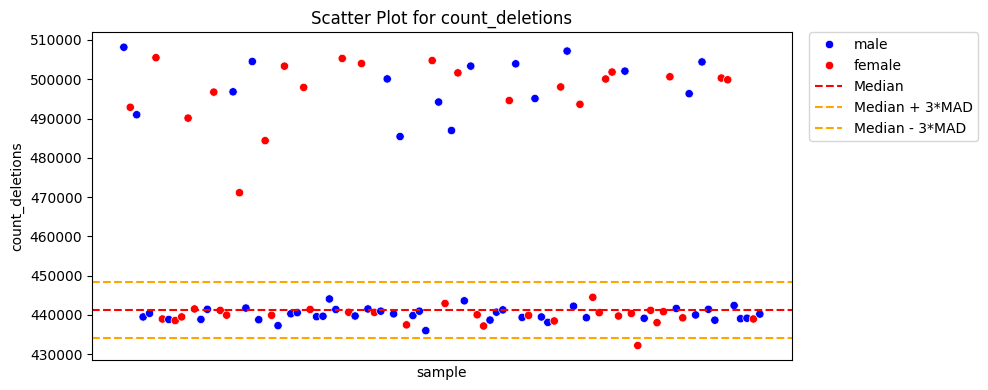

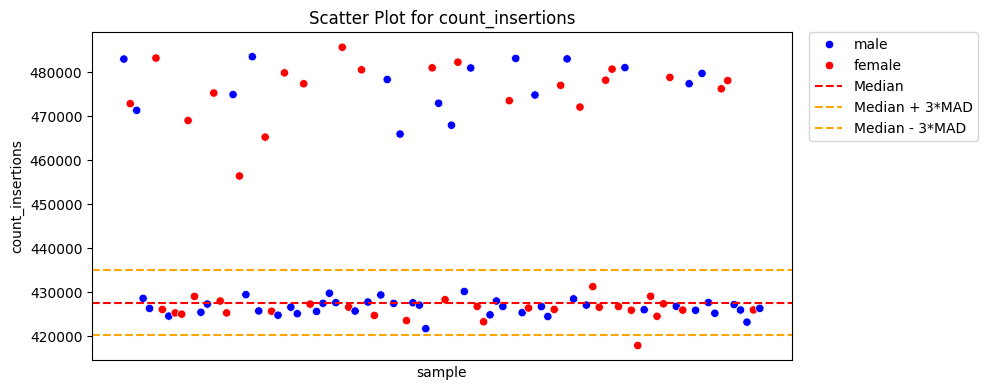

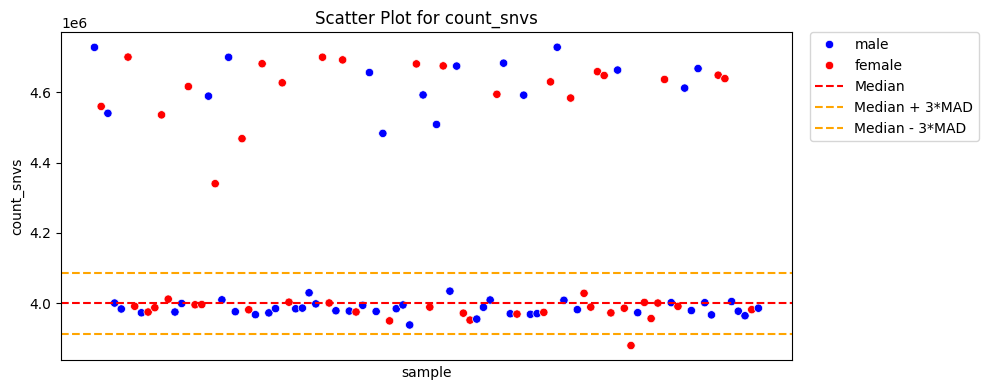

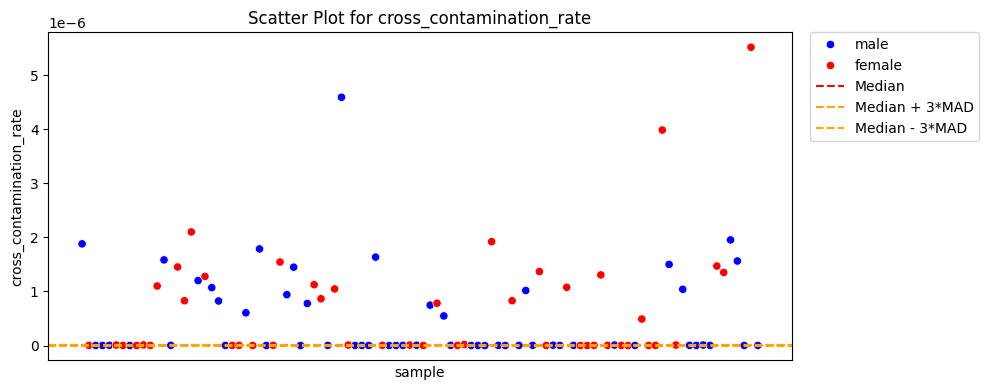

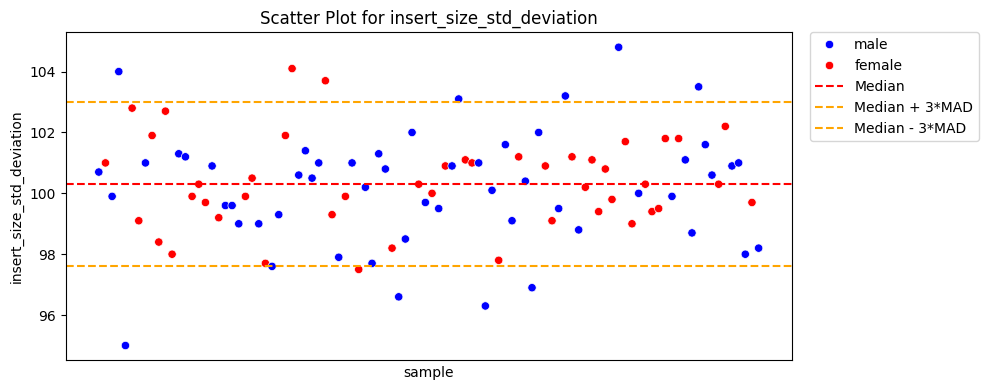

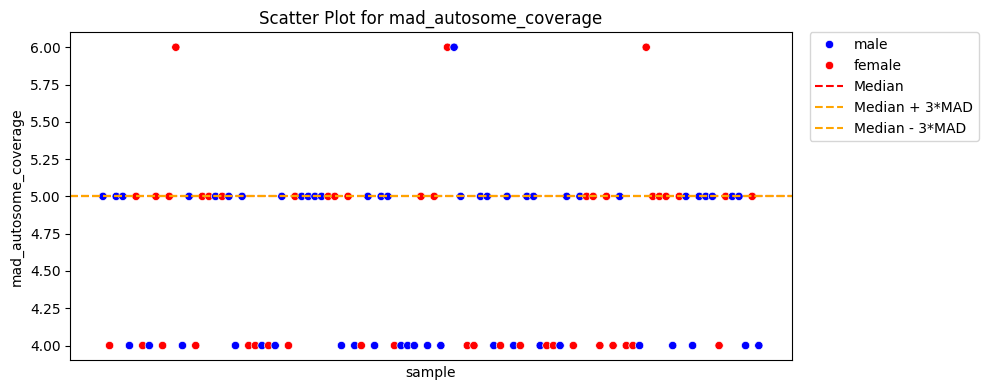

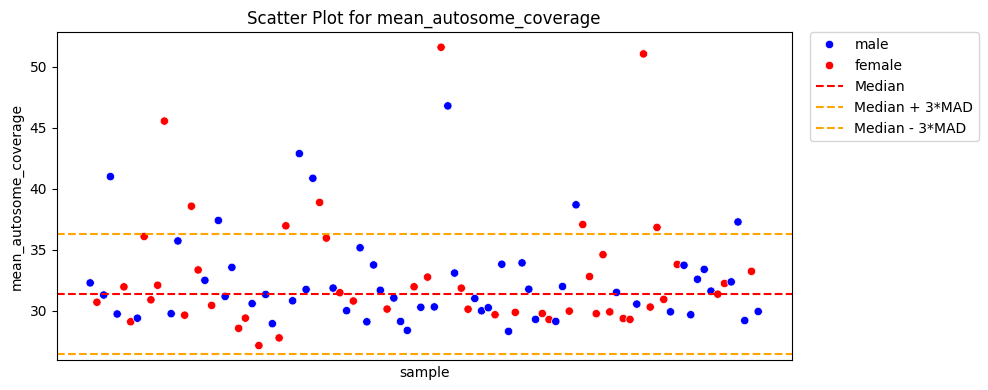

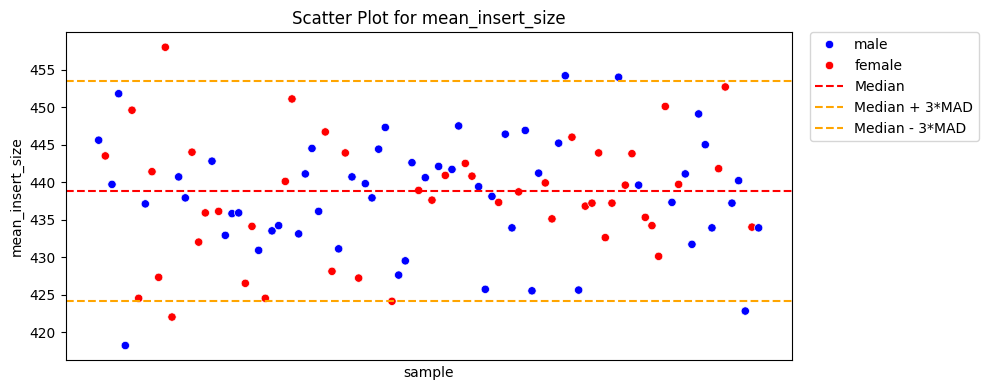

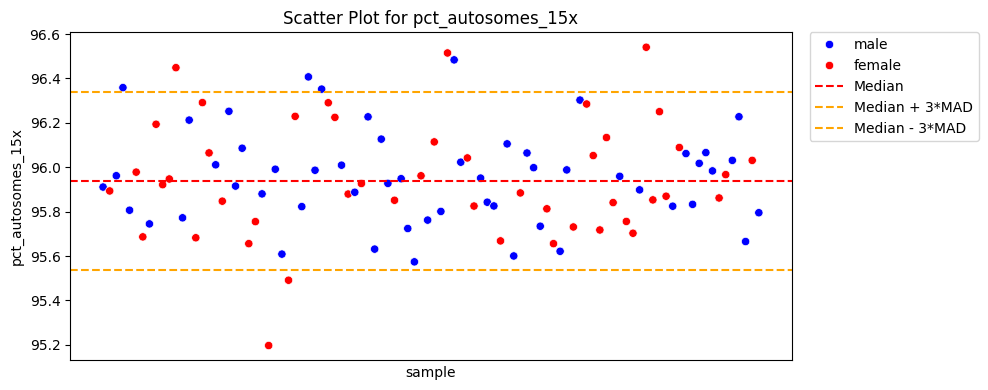

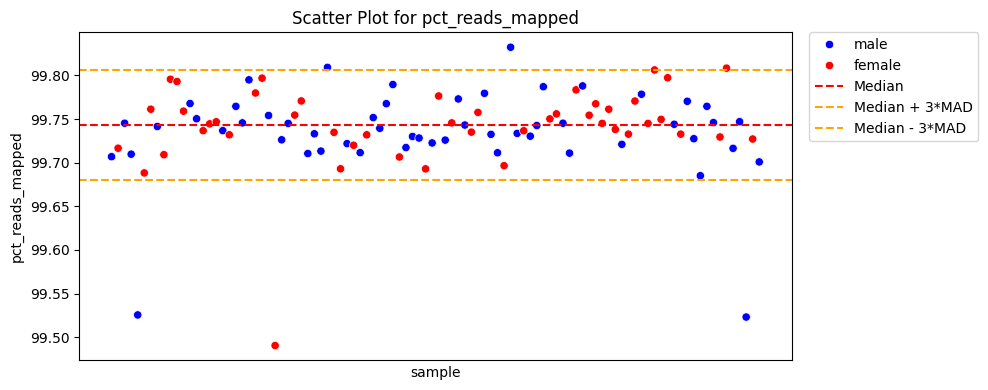

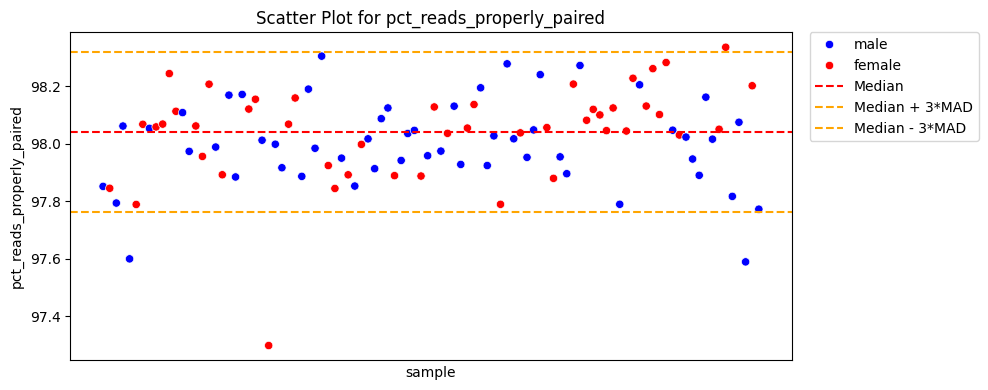

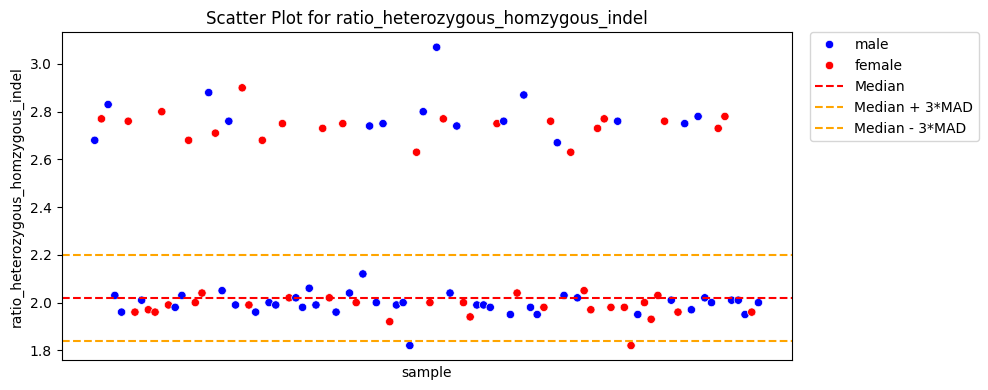

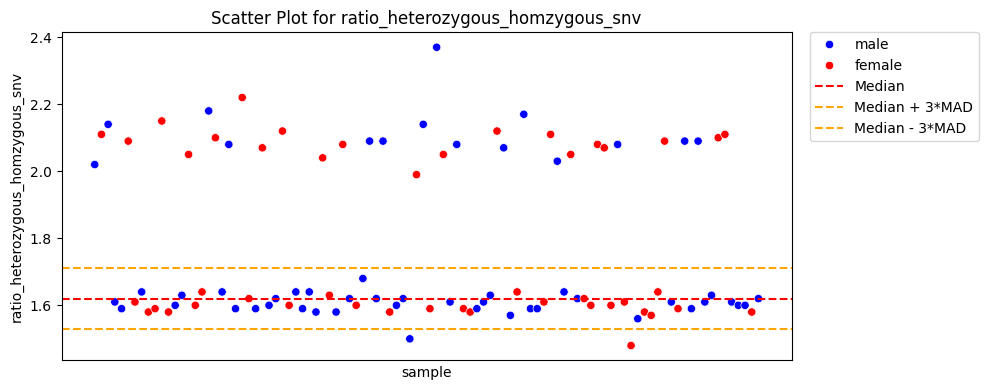

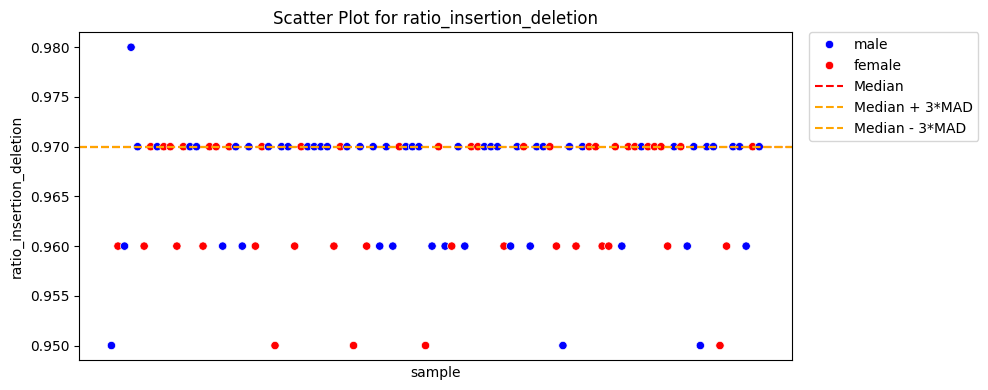

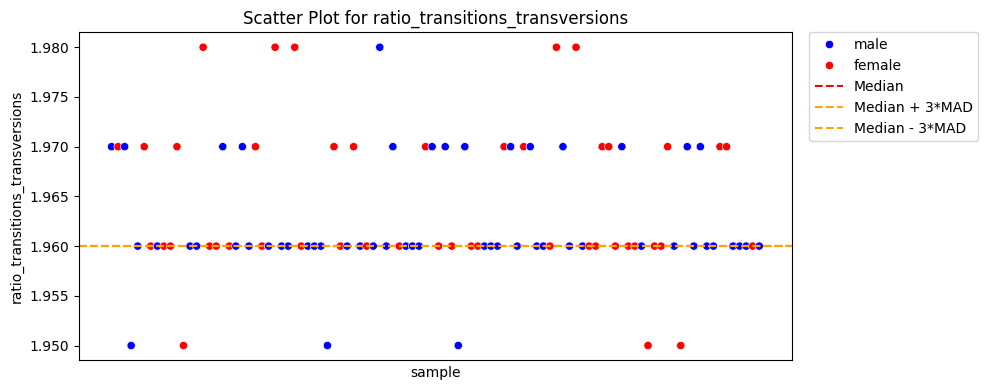

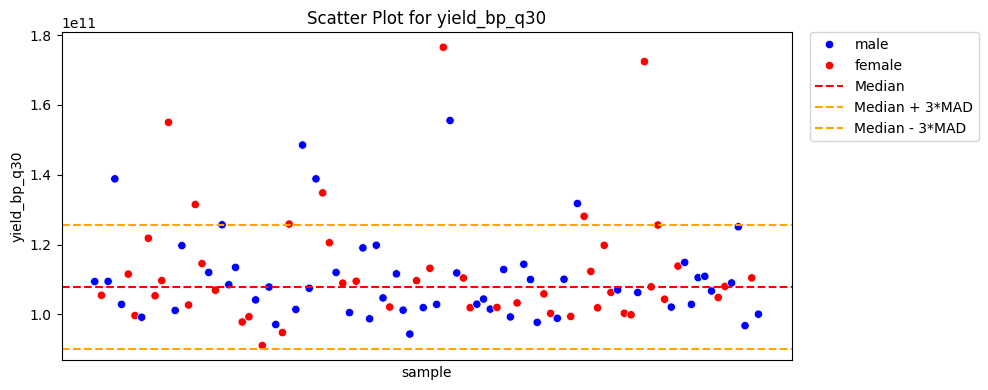

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# For each metric
for col in merged_dft.columns[1:17]:
     
    # Create a scatter plot
    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=merged_dft, x="index", y=col, 
                    hue='Sex', palette = {'male':'blue', 'female':'red'} )
    
    # Calculate median and MAD
    median = merged_dft[col].median()
    mad = np.median(np.abs(merged_dft[col] - median))
    
    # Add median and +/-3MAD lines
    plt.axhline(y=median, linestyle='--', color='red', label='Median')
    plt.axhline(y=median + 3 * mad, linestyle='--', color='orange', label='Median + 3*MAD')
    plt.axhline(y=median - 3 * mad, linestyle='--', color='orange', label='Median - 3*MAD')
    
    # Set plot title and labels
    plt.title(f"Scatter Plot for {col}")
    plt.xlabel("sample")
    plt.ylabel(col)
    plt.xticks([]) # Hide x-axis labels

    if col in ylims:
        plt.ylim(ylims[col][0], ylims[col][1])

    # Show legend
    # plt.legend()
    plt.legend(bbox_to_anchor=(1.025,1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()

    # Show the plot
    plt.show()


## Plot colour by population

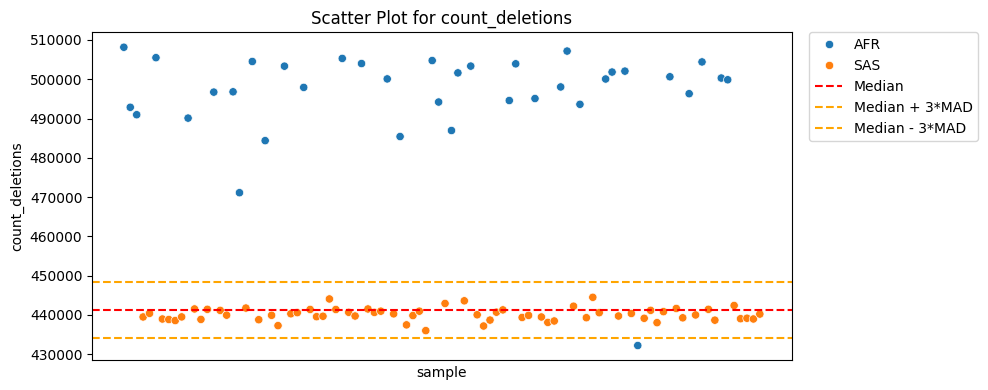

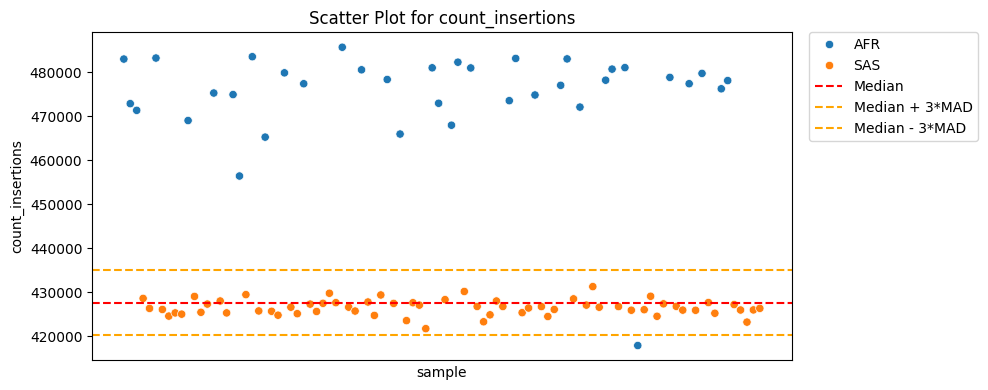

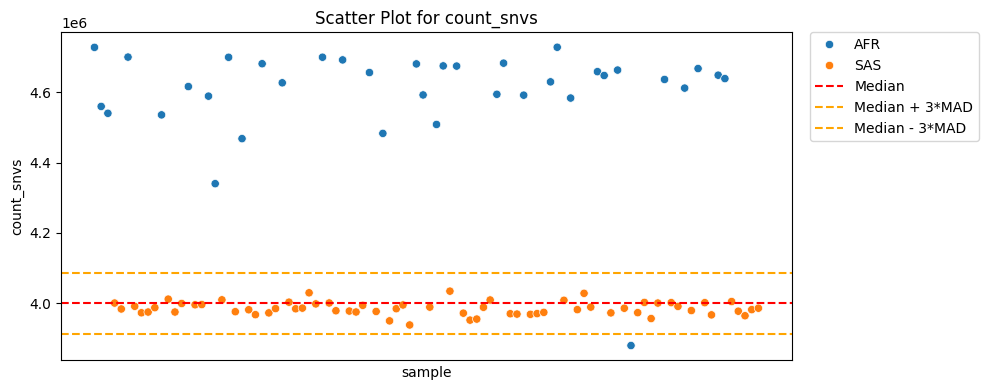

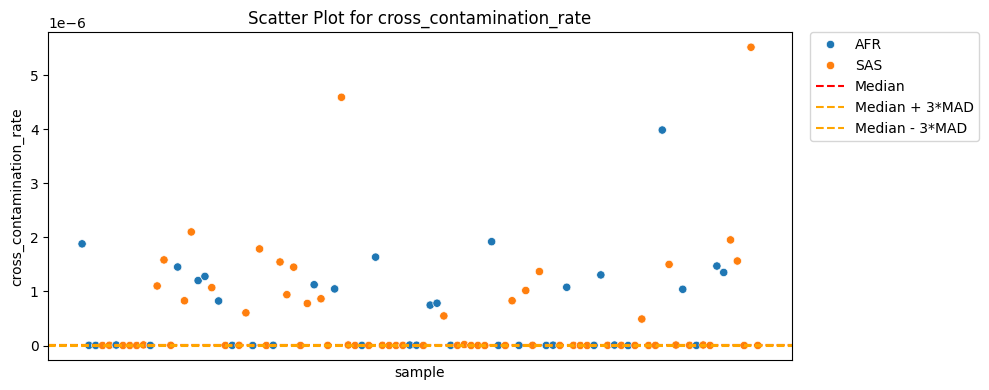

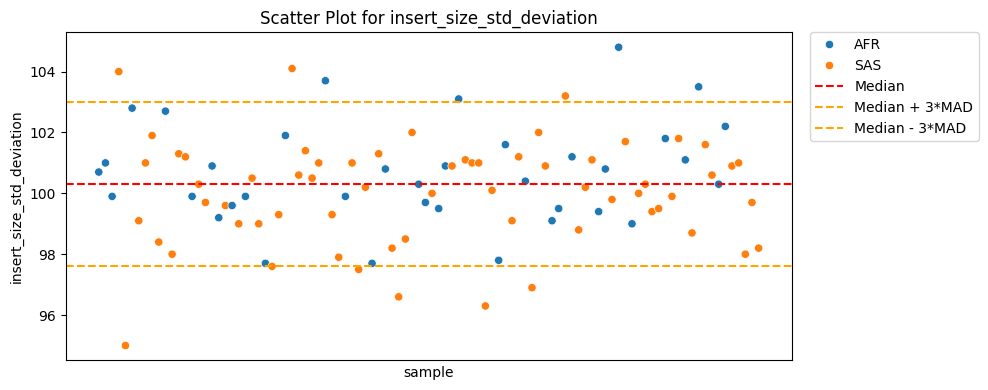

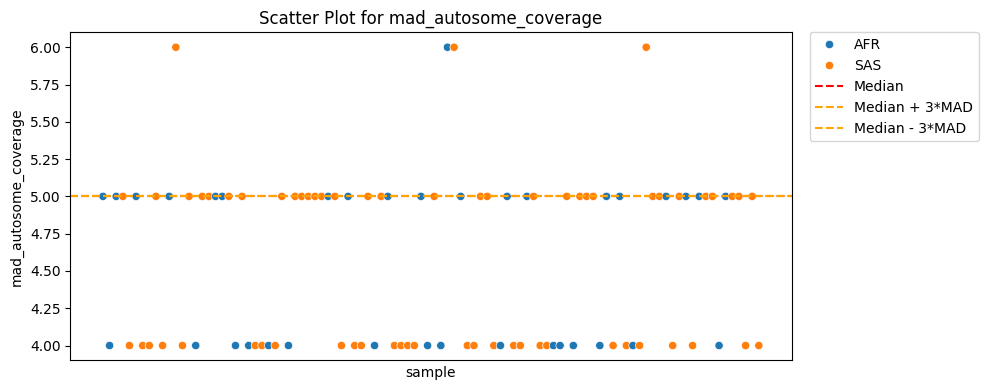

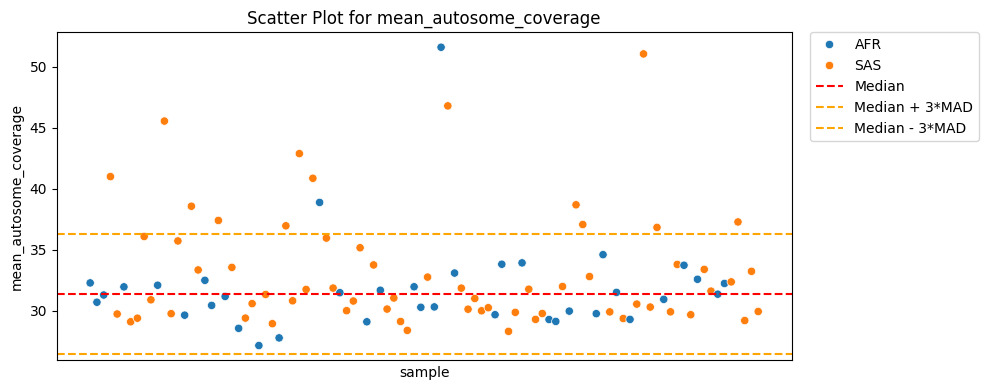

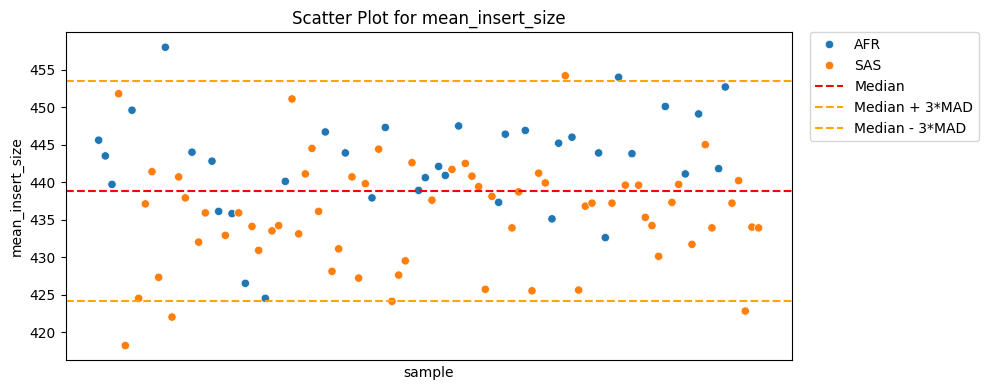

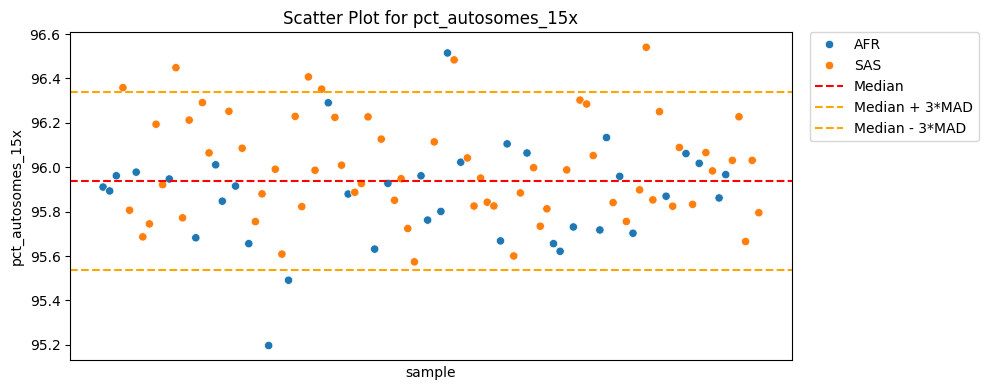

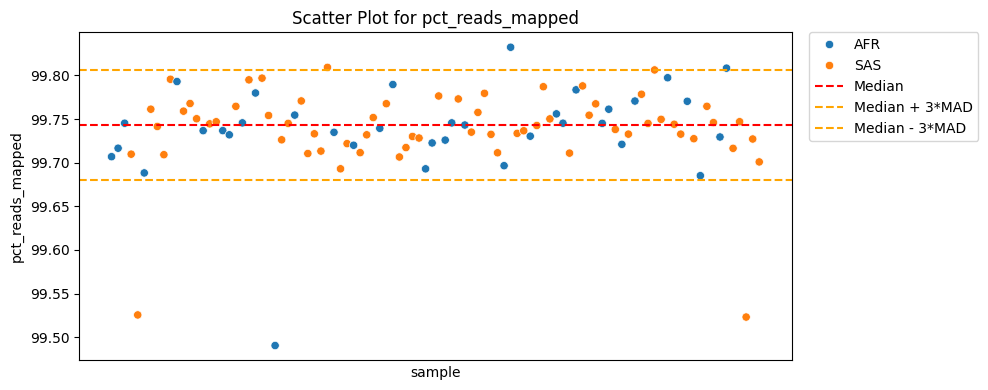

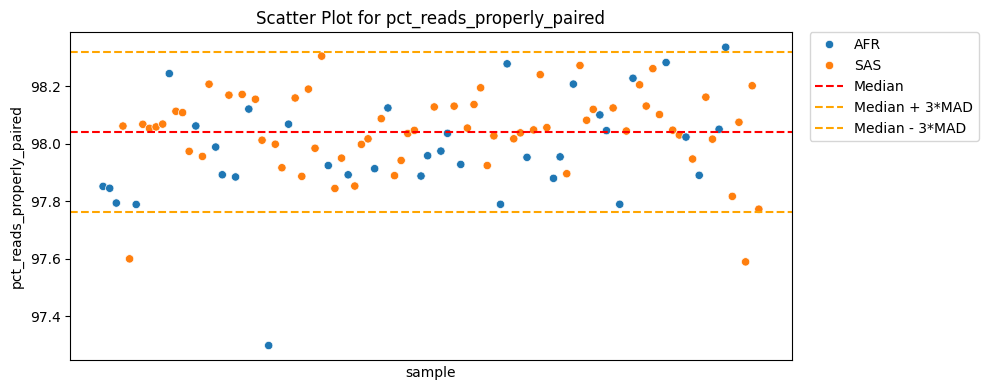

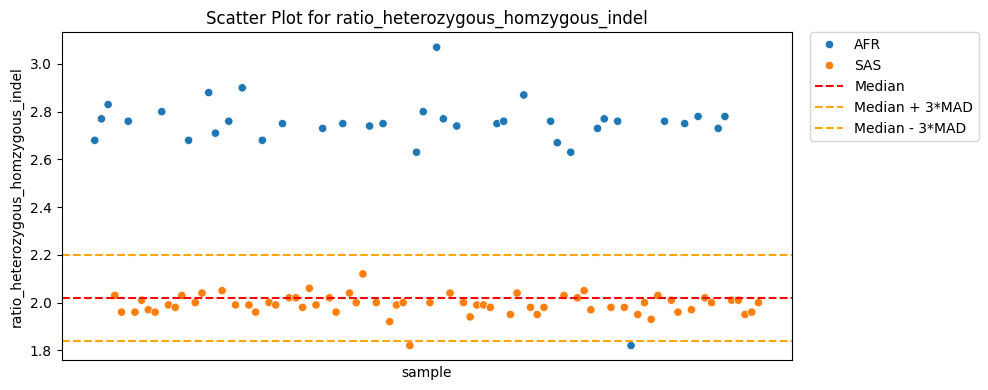

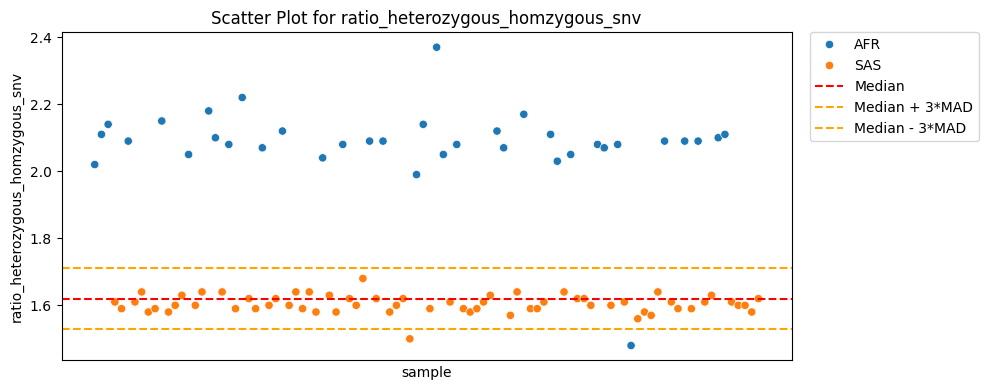

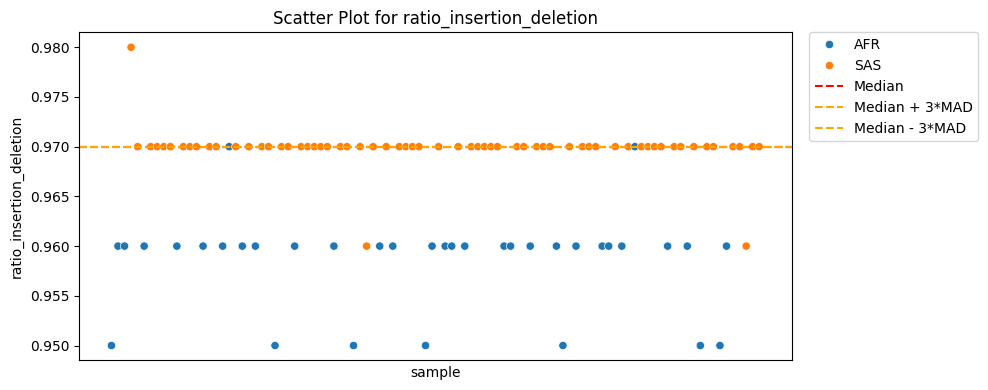

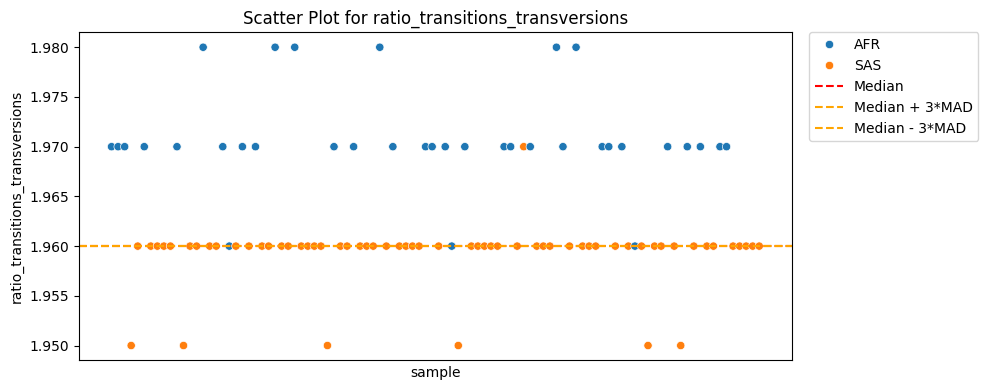

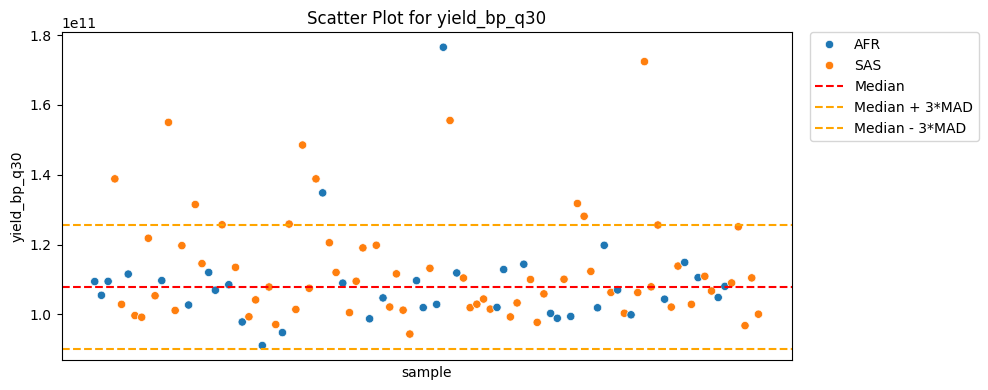

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# For each metric
for col in merged_dft.columns[1:17]:
     
    # Create a scatter plot
    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=merged_dft, x="index", y=col, hue='Superpopulation_code')
    
    # Calculate median and MAD
    median = merged_dft[col].median()
    mad = np.median(np.abs(merged_dft[col] - median))
    
    # Add median and +/-3MAD lines
    plt.axhline(y=median, linestyle='--', color='red', label='Median')
    plt.axhline(y=median + 3 * mad, linestyle='--', color='orange', label='Median + 3*MAD')
    plt.axhline(y=median - 3 * mad, linestyle='--', color='orange', label='Median - 3*MAD')
    
    # Set plot title and labels
    plt.title(f"Scatter Plot for {col}")
    plt.xlabel("sample")
    plt.ylabel(col)
    plt.xticks([]) # Hide x-axis labels

    if col in ylims:
        plt.ylim(ylims[col][0], ylims[col][1])

    # Show legend
    # plt.legend()
    plt.legend(bbox_to_anchor=(1.025,1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()

    # Show the plot
    plt.show()